In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: xlabel='bmi', ylabel='Density'>

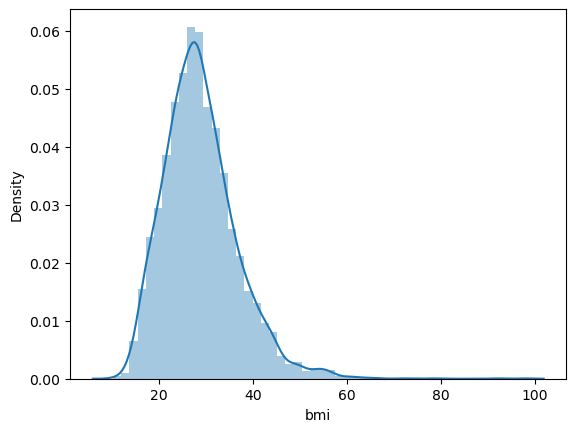

In [6]:
sns.distplot(df["bmi"])

In [7]:
df['bmi'].median()

28.1

In [8]:
df["bmi"].fillna(28.1,inplace=True)

In [9]:
df.isna().sum()/len(df)*100  ## no null values

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

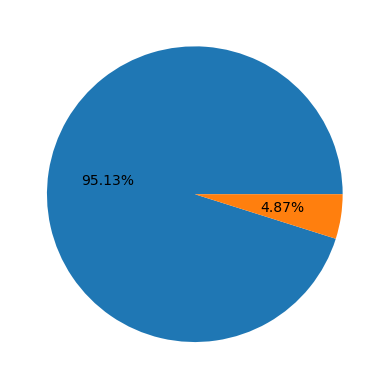

In [13]:
plt.pie(df["stroke"].value_counts(),autopct='%.2f%%')
plt.show()

In [14]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [15]:
df['gender'].replace({'Other':'Female'},inplace=True)


<Axes: xlabel='gender', ylabel='count'>

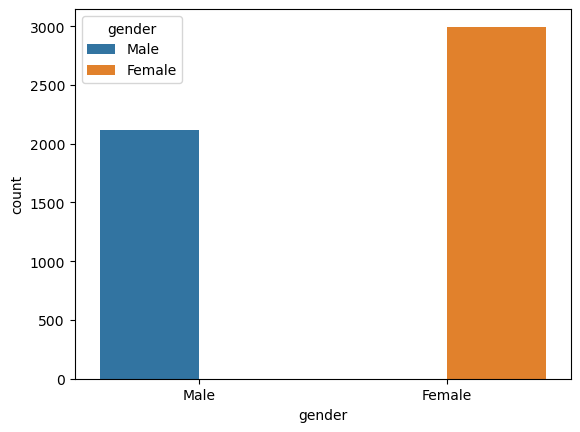

In [16]:
sns.countplot(x=df["gender"],hue=df["gender"])


<Axes: xlabel='hypertension', ylabel='count'>

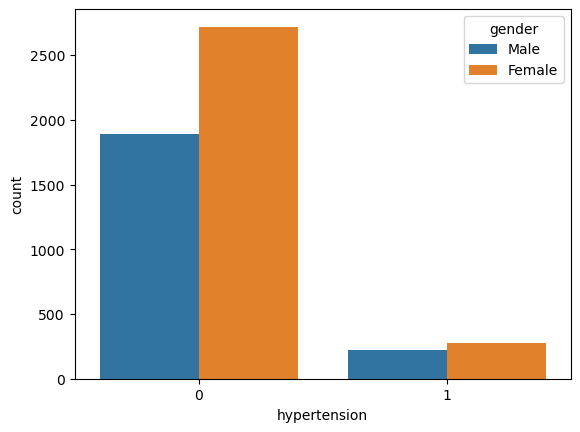

In [19]:
df['hypertension'].nunique()
# Returns number of unique values in this attribute
sns.countplot(x=df['hypertension'],data=df,hue=df['gender'])
#sns.countplot(x=df['hypertension'],data=df,hue=df["stroke"])

Unique Value
 [1 0]
Value Counts
 heart_disease
0    4834
1     276
Name: count, dtype: int64


<Axes: xlabel='heart_disease', ylabel='count'>

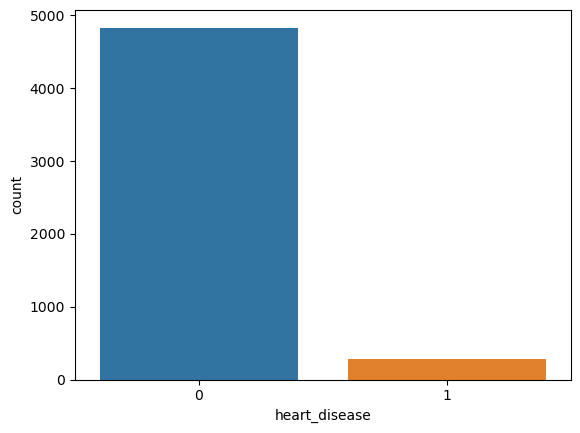

In [20]:
print('Unique Value\n',df['heart_disease'].unique())
print('Value Counts\n',df['heart_disease'].value_counts())
# Above code will return unique value for heart disease attribute and its value counts
sns.countplot(x=df['heart_disease'],data=df)


Unique Values
 ['Yes' 'No']
Value Counts
 ever_married
Yes    3353
No     1757
Name: count, dtype: int64


<Axes: xlabel='ever_married', ylabel='count'>

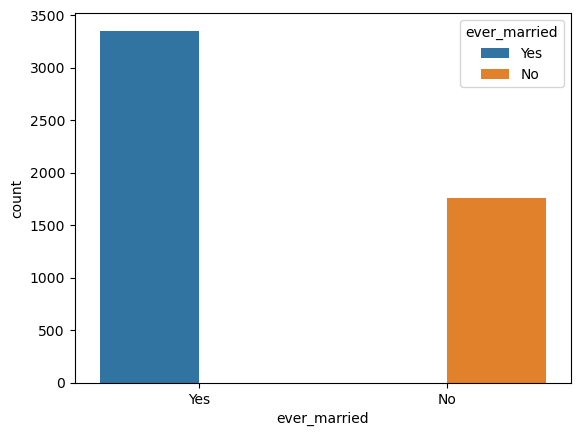

In [21]:
print('Unique Values\n',df['ever_married'].unique())
print('Value Counts\n',df['ever_married'].value_counts())
sns.countplot(x=df['ever_married'],data=df,hue=df["ever_married"])

In [22]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: xlabel='smoking_status', ylabel='count'>

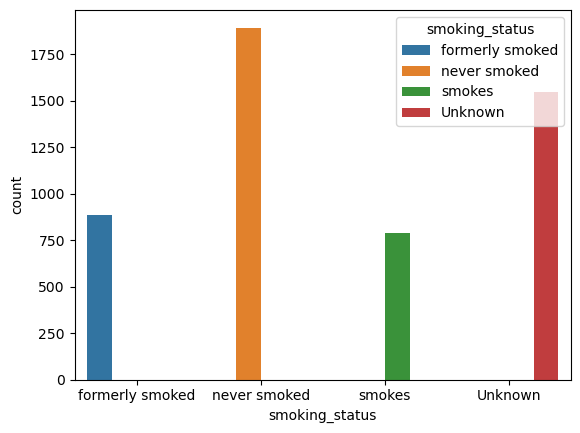

In [23]:
sns.countplot(x=df['smoking_status'],data=df,hue=df["smoking_status"])

In [24]:
df['smoking_status'] = df["work_type"].replace({"never smoked":0,"Unknown":1,"formerly smoked":2,"smokes":-2})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,Private,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,Self-employed,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,Private,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,Private,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,Self-employed,1


In [25]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Unique Values
 ['Urban' 'Rural']
Value Counts
 Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


<Axes: xlabel='Residence_type', ylabel='count'>

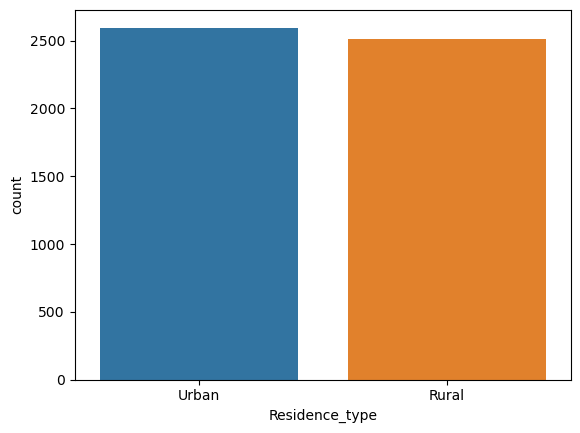

In [26]:
print('Unique Values\n',df['Residence_type'].unique())
print("Value Counts\n",df['Residence_type'].value_counts())
# Above code will return unique values of variable and its count
sns.countplot(data=df,x='Residence_type')

In [27]:
df.drop(["id","gender","Residence_type"],axis=1,inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,36.6,Private,1
1,61.0,0,0,Yes,Self-employed,202.21,28.1,Self-employed,1
2,80.0,0,1,Yes,Private,105.92,32.5,Private,1
3,49.0,0,0,Yes,Private,171.23,34.4,Private,1
4,79.0,1,0,Yes,Self-employed,174.12,24.0,Self-employed,1


In [30]:
df['bmi'].isna().sum()
# Returns number null values

0

In [31]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
# Filling null values with average value

In [32]:
df['bmi'].nunique()
# Returns number of unique values in that attribute

418

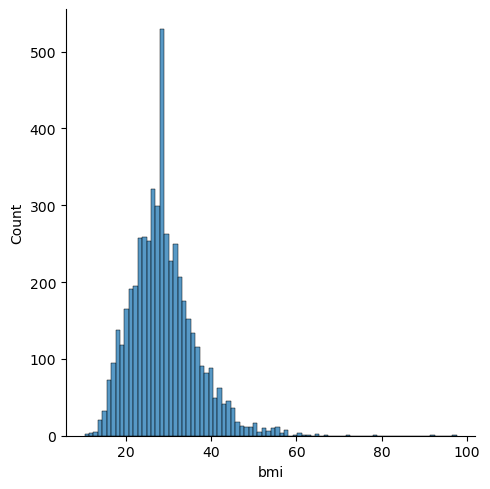

In [33]:
sns.displot(df['bmi'])
# Distribution of bmi

In [35]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

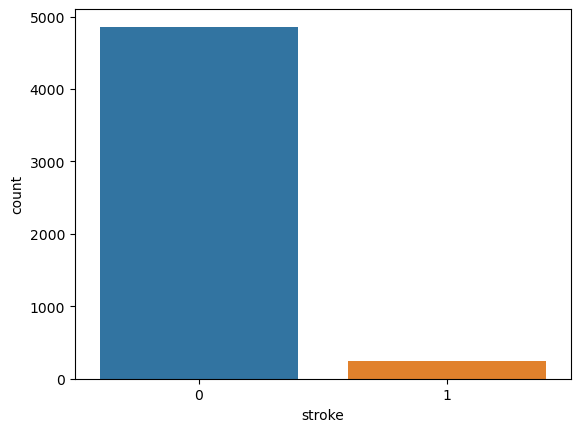

In [36]:
sns.countplot(x=df['stroke'],data=df)

In [39]:
import scipy.stats as sts 

In [40]:
pval = 0.7895490538408245

In [41]:
pval< 0.05  

False

In [42]:
ttest,pval  = sts.ttest_ind(df["stroke"],df["age"])
pval

0.0

In [43]:
pval < 0.05

True

In [44]:
sts.chi2_contingency(pd.crosstab(df["stroke"],df["hypertension"]))

Chi2ContingencyResult(statistic=81.6053682482931, pvalue=1.661621901511823e-19, dof=1, expected_freq=array([[4387.2665362,  473.7334638],
       [ 224.7334638,   24.2665362]]))

In [45]:
pval = 1.661621901511823e-19
pval < 0.05

True

In [46]:
sts.chi2_contingency(pd.crosstab(df["stroke"],df["heart_disease"]))

Chi2ContingencyResult(statistic=90.25956125843324, pvalue=2.0887845685229236e-21, dof=1, expected_freq=array([[4598.44892368,  262.55107632],
       [ 235.55107632,   13.44892368]]))

In [47]:
pval = 2.0887845685229236e-21

In [48]:
pval < 0.05

True

In [49]:
sts.chi2_contingency(pd.crosstab(df["stroke"],df["ever_married"]))

Chi2ContingencyResult(statistic=58.923890259034195, pvalue=1.6389021142314745e-14, dof=1, expected_freq=array([[1671.38493151, 3189.61506849],
       [  85.61506849,  163.38493151]]))

In [50]:
pval = 1.6389021142314745e-14
pval < 0.05

True

In [51]:
sts.chi2_contingency(pd.crosstab(df["stroke"],df["work_type"]))

Chi2ContingencyResult(statistic=49.163511976675295, pvalue=5.397707801896119e-10, dof=4, expected_freq=array([[6.24985714e+02, 2.09279843e+01, 2.78247065e+03, 7.79091781e+02,
        6.53523875e+02],
       [3.20142857e+01, 1.07201566e+00, 1.42529354e+02, 3.99082192e+01,
        3.34761252e+01]]))

In [52]:
pval=5.397707801896119e-10
pval < 0.05

True

In [53]:
pval=0.29833169286876987
pval < 0.05

False

In [54]:
tstat,pval=sts.f_oneway(df["stroke"],df["avg_glucose_level"])

In [55]:
pval

0.0

In [56]:
pval<0.05

True

In [57]:
tstat,pval=sts.f_oneway(df["stroke"],df["bmi"])
pval<0.05

True

In [58]:
sts.chi2_contingency(pd.crosstab(df["stroke"],df["smoking_status"]))

Chi2ContingencyResult(statistic=49.163511976675295, pvalue=5.397707801896119e-10, dof=4, expected_freq=array([[6.24985714e+02, 2.09279843e+01, 2.78247065e+03, 7.79091781e+02,
        6.53523875e+02],
       [3.20142857e+01, 1.07201566e+00, 1.42529354e+02, 3.99082192e+01,
        3.34761252e+01]]))

In [59]:
pval=2.0853997025008455e-06
pval<0.05

True

In [61]:
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,36.6,Private,1
1,61.0,0,0,Yes,Self-employed,202.21,28.1,Self-employed,1
2,80.0,0,1,Yes,Private,105.92,32.5,Private,1
3,49.0,0,0,Yes,Private,171.23,34.4,Private,1
4,79.0,1,0,Yes,Self-employed,174.12,24.0,Self-employed,1


In [62]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [63]:
df["work_type"] = df["work_type"].replace({"Private":0,"Self-employed":1,"children":-1,
                                            "Govt_job":2,"Never_worked":-2})

In [64]:
df["work_type"].value_counts()

work_type
 0    2925
 1     819
-1     687
 2     657
-2      22
Name: count, dtype: int64

In [65]:
df["ever_married"].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [66]:
df["ever_married"] = df["ever_married"].replace({"No":0,"Yes":1})

In [67]:
df["smoking_status"].value_counts()

smoking_status
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [68]:
df['smoking_status'] = df["work_type"].replace({"never smoked":0,"Unknown":1,"formerly smoked":2,"smokes":-2})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,0,228.69,36.6,0,1
1,61.0,0,0,1,1,202.21,28.1,1,1
2,80.0,0,1,1,0,105.92,32.5,0,1
3,49.0,0,0,1,0,171.23,34.4,0,1
4,79.0,1,0,1,1,174.12,24.0,1,1


<Axes: xlabel='bmi', ylabel='Density'>

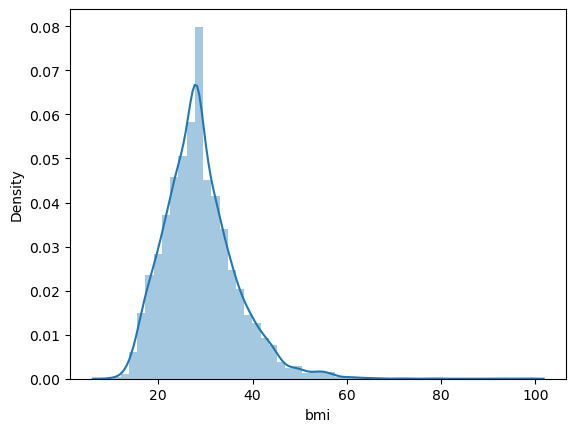

In [69]:
sns.distplot(df["bmi"])

<Axes: xlabel='stroke', ylabel='Density'>

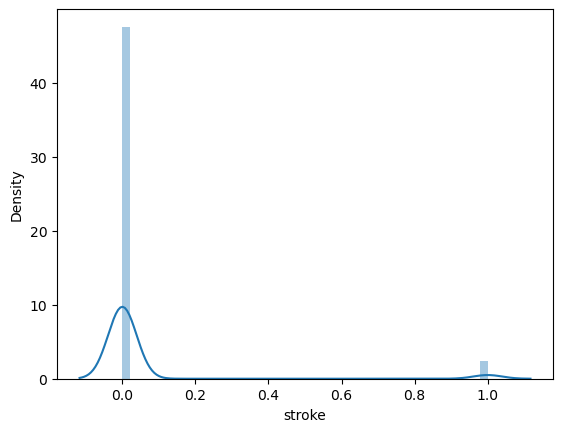

In [70]:
sns.distplot(df["stroke"])

In [71]:
df_num = df.select_dtypes(exclude='object')

#df_num=df_num.drop(['smoking_status','ever_married','work_type','stroke','hypertension','heart_disease'],axis=1)

In [78]:
df_cat=df[['hypertension','heart_disease','ever_married','work_type','smoking_status']]
df_cat.head()

,hypertension,heart_disease,ever_married,work_type,smoking_status
0,0,1,1,0,0
1,0,0,1,1,1
2,0,1,1,0,0
3,0,0,1,0,0
4,1,0,1,1,1


In [80]:
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,0,228.69,36.6,0,1
1,61.0,0,0,1,1,202.21,28.1,1,1
2,80.0,0,1,1,0,105.92,32.5,0,1
3,49.0,0,0,1,0,171.23,34.4,0,1
4,79.0,1,0,1,1,174.12,24.0,1,1


In [81]:
X=df.drop(['stroke'],axis=1)
y=df['stroke']

In [82]:
X.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,1,0,228.69,36.6,0
1,61.0,0,0,1,1,202.21,28.1,1
2,80.0,0,1,1,0,105.92,32.5,0
3,49.0,0,0,1,0,171.23,34.4,0
4,79.0,1,0,1,1,174.12,24.0,1


In [83]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=10)

In [86]:
xtrain.shape

(3577, 8)

In [87]:
xtest.shape

(1533, 8)

In [88]:
ytrain.shape

(3577,)

In [89]:
ytest.shape

(1533,)

In [90]:
ytrain.value_counts()/len(ytrain)*100

stroke
0    95.27537
1     4.72463
Name: count, dtype: float64

In [91]:
ytest.value_counts()/len(ytest)*100

stroke
0    94.781474
1     5.218526
Name: count, dtype: float64

In [92]:

from imblearn.over_sampling import SMOTE

In [93]:
smote=SMOTE(sampling_strategy=0.3)

In [94]:
new_xtrain,new_ytrain=smote.fit_resample(xtrain,ytrain)

In [95]:
new_ytrain.value_counts()/len(new_ytrain)*100

stroke
0    76.930023
1    23.069977
Name: count, dtype: float64

In [96]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,roc_auc_score,f1_score,precision_score
xtrain,xtest,ytrain,ytest=train_test_split(new_xtrain,new_ytrain,test_size=0.3,random_state=1)
logreg=LogisticRegression()
logreg_pred=logreg.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(ytest,logreg_pred))
print(confusion_matrix(ytest,logreg_pred))
print(classification_report(ytest,logreg_pred))

accuracy    =accuracy_score(ytest,logreg_pred)
f1score    =f1_score(ytest,logreg_pred)
recall     =recall_score(ytest,logreg_pred)
precision   =precision_score(ytest,logreg_pred)
auc         = roc_auc_score(ytest,logreg_pred)

cols_per = ["Model", "Accuracy","Recall","Precision","F1 Score",'AUC']
result_per = pd.DataFrame(columns = cols_per)

model_per = pd.Series({  "Model": "LogisticRegression",
                        "Accuracy":accuracy,
                        "Recall":recall,
                        "Precision":precision,
                        "F1 Score":f1score,
                        "AUC":auc
                        })

result_per = pd.Series(model_per)

print(result_per)

0.8465011286681715
[[954  69]
 [135 171]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1023
           1       0.71      0.56      0.63       306

    accuracy                           0.85      1329
   macro avg       0.79      0.75      0.76      1329
weighted avg       0.84      0.85      0.84      1329

Model        LogisticRegression
Accuracy               0.846501
Recall                 0.558824
Precision                0.7125
F1 Score               0.626374
AUC                    0.745687
dtype: object


In [97]:
y_pred_train=logreg.predict(xtrain)
print(classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2385
           1       0.69      0.55      0.61       716

    accuracy                           0.84      3101
   macro avg       0.78      0.74      0.76      3101
weighted avg       0.83      0.84      0.83      3101



In [98]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score
xtrain,xtest,ytrain,ytest=train_test_split(new_xtrain,new_ytrain,test_size=0.3,random_state=1)
dt=DecisionTreeClassifier(random_state=7)
dt_pred=dt.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(ytest,dt_pred))
print(confusion_matrix(ytest,dt_pred))
print(classification_report(ytest,dt_pred))

accuracy    =accuracy_score(ytest,dt_pred)
f1score    =f1_score(ytest,dt_pred)
recall     =recall_score(ytest,dt_pred)
precision   =precision_score(ytest,dt_pred)
auc         = roc_auc_score(ytest,dt_pred)

model_per = pd.Series({  "Model": "DecisionTree",
                        "Accuracy":accuracy,
                        "Recall":recall,
                        "Precision":precision,
                        "F1 Score":f1score,
                        "AUC":auc
                        })

result_per = pd.Series(model_per)
result_per

0.8848758465011287
[[946  77]
 [ 76 230]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1023
           1       0.75      0.75      0.75       306

    accuracy                           0.88      1329
   macro avg       0.84      0.84      0.84      1329
weighted avg       0.89      0.88      0.88      1329



Model        DecisionTree
Accuracy         0.884876
Recall           0.751634
Precision        0.749186
F1 Score         0.750408
AUC              0.838183
dtype: object

In [99]:
y_pred_train=dt.predict(xtrain)
print(classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2385
           1       1.00      1.00      1.00       716

    accuracy                           1.00      3101
   macro avg       1.00      1.00      1.00      3101
weighted avg       1.00      1.00      1.00      3101



In [100]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion = 'entropy',max_depth =14,
                        min_samples_leaf=15,
                        min_samples_split=45,     
                        random_state = 7)
xtrain,xtest,ytrain,ytest=train_test_split(new_xtrain,new_ytrain,test_size=0.3,random_state=1)
rf_pred=rf.fit(xtrain,ytrain).predict(xtest)
print(accuracy_score(ytest,rf_pred))
print(confusion_matrix(ytest,rf_pred))
print(classification_report(ytest,rf_pred))


accuracy    =accuracy_score(ytest,rf_pred)
f1score    =f1_score(ytest,rf_pred)
recall     =recall_score(ytest,rf_pred)
precision   =precision_score(ytest,rf_pred)
auc         = roc_auc_score(ytest,rf_pred)

model_per = pd.Series({  "Model": "RandomForest",
                        "Accuracy":accuracy,
                        "Recall":recall,
                        "Precision":precision,
                        "AUC":auc
                        })

result_per = pd.Series(model_per)
result_per

0.8645598194130926
[[971  52]
 [128 178]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1023
           1       0.77      0.58      0.66       306

    accuracy                           0.86      1329
   macro avg       0.83      0.77      0.79      1329
weighted avg       0.86      0.86      0.86      1329



Model        RandomForest
Accuracy          0.86456
Recall           0.581699
Precision        0.773913
AUC              0.765434
dtype: object

In [101]:
y_pred_train=rf.predict(xtrain)
print(classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2385
           1       0.83      0.64      0.72       716

    accuracy                           0.89      3101
   macro avg       0.86      0.80      0.82      3101
weighted avg       0.88      0.89      0.88      3101



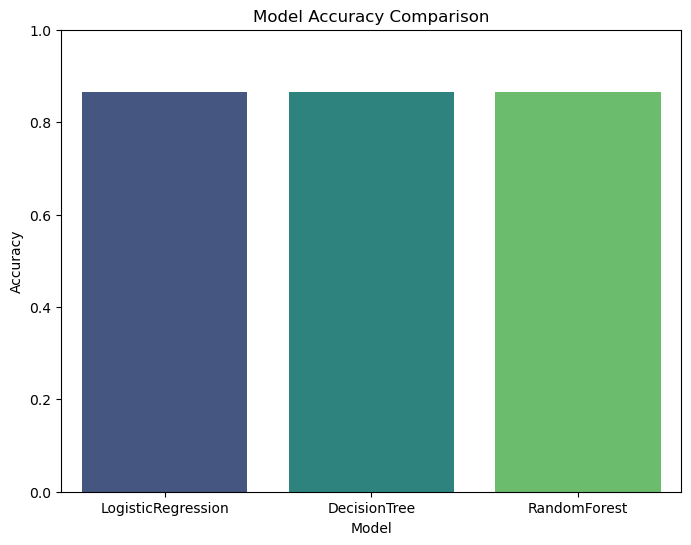

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame with the model names and their accuracies
models = ['LogisticRegression', 'DecisionTree', 'RandomForest']
accuracies = [accuracy, accuracy, accuracy]
df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Creating the countplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Setting the y-axis limit from 0 to 1 for accuracy values
plt.show()

In [103]:

highest_accuracy_model = result_per
print("\nThe model with the highest accuracy is:", highest_accuracy_model)


The model with the highest accuracy is: Model        RandomForest
Accuracy          0.86456
Recall           0.581699
Precision        0.773913
AUC              0.765434
dtype: object
